In [20]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore")

pd.set_option('display.max_rows',100)
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

from sklearn.preprocessing import PolynomialFeatures

In [2]:
ds = pd.read_csv('Position_Salaries.csv')

In [3]:
ds

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [11]:
X = ds.iloc[:,1:-1].values
y = ds.iloc[:,-1].values

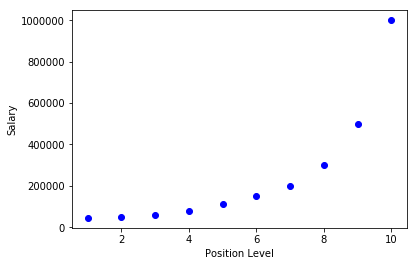

In [6]:
plt.scatter(X,y,color='blue')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

In [7]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [12]:
lr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [15]:
x_pred = lr.predict(X)

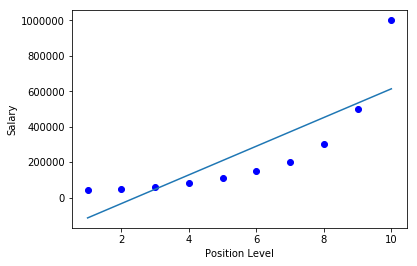

In [16]:
plt.scatter(X,y,color='blue')
plt.plot(X,x_pred)
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

In [19]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y,x_pred)

26695878787.878788

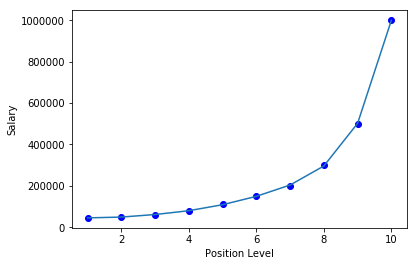

In [30]:
poly_reg = PolynomialFeatures(degree=6)
X_poly = poly_reg.fit_transform(X)
lr2 = LinearRegression()
lr2.fit(X_poly,y)
x_pred_poly = lr2.predict(X_poly)
plt.scatter(X,y,color='blue')
plt.plot(X,x_pred_poly)
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

In [22]:
X_poly

array([[1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01],
       [1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01],
       [1.000e+00, 4.000e+00, 1.600e+01, 6.400e+01, 2.560e+02],
       [1.000e+00, 5.000e+00, 2.500e+01, 1.250e+02, 6.250e+02],
       [1.000e+00, 6.000e+00, 3.600e+01, 2.160e+02, 1.296e+03],
       [1.000e+00, 7.000e+00, 4.900e+01, 3.430e+02, 2.401e+03],
       [1.000e+00, 8.000e+00, 6.400e+01, 5.120e+02, 4.096e+03],
       [1.000e+00, 9.000e+00, 8.100e+01, 7.290e+02, 6.561e+03],
       [1.000e+00, 1.000e+01, 1.000e+02, 1.000e+03, 1.000e+04]])

In [35]:
lr2.score(X_poly,y)

0.9999494749253776

In [36]:
poly_reg.transform([[6.5]])

array([[1.00000000e+00, 6.50000000e+00, 4.22500000e+01, 2.74625000e+02,
        1.78506250e+03, 1.16029062e+04, 7.54188906e+04]])

In [37]:
lr2.predict(poly_reg.transform([[6.5]]))

array([174192.81930584])